In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")
y = y.iloc[:, 1]
missing = y.isnull()
X = X[~missing]
y = y[~missing]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 320768)

In [28]:
Tree_best = tree.DecisionTreeClassifier(criterion = "entropy", min_samples_leaf = 10, max_depth = 3, max_leaf_nodes = None, min_samples_split=2, random_state=320768)

In [ ]:
#Calculating confusion matrix and basic metrics for chosen model.
Tree_best.fit(X_train, y_train)
pred_train = Tree_best.predict(X_train)
pred_test = Tree_best.predict(X_test)

In [ ]:
#Test Set
tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
print("(tn, fp, fn, tp) = (%d, %d, %d, %d)" % (tn, fp, fn, tp))
print("accuracy: %0.3f" % (accuracy_score(y_test, pred_test)))
print("recall: %0.3f" % (recall_score(y_test, pred_test)))
print("precision: %0.3f" % (precision_score(y_test, pred_test)))

(tn, fp, fn, tp) = (115, 36, 7, 126)
accuracy: 0.849
recall: 0.947
precision: 0.778


In [ ]:
#Train Set
tn, fp, fn, tp = confusion_matrix(y_train, pred_train).ravel()
print("(tn, fp, fn, tp) = (%d, %d, %d, %d)" % (tn, fp, fn, tp))
print("accuracy: %0.3f" % (accuracy_score(y_train, pred_train)))
print("recall: %0.3f" % (recall_score(y_train, pred_train)))
print("precision: %0.3f" % (precision_score(y_train, pred_train)))

(tn, fp, fn, tp) = (256, 68, 7, 331)
accuracy: 0.887
recall: 0.979
precision: 0.830


Współczynnik AUC na danych treningowych wynosi: 0.963


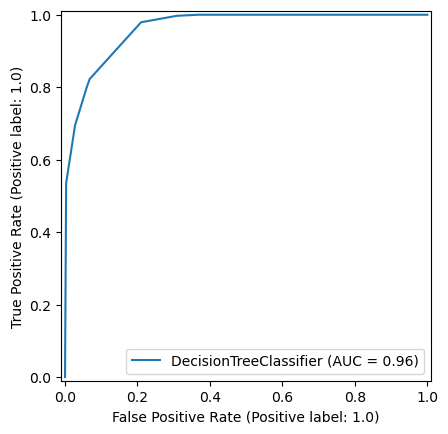

In [ ]:
#Plotting ROC curve and calculating AUC score for train set
print(RocCurveDisplay.from_estimator(Tree_best, X_train, y_train))
print("Współczynnik AUC na danych treningowych wynosi: %0.3f" %(roc_auc_score(y_train, Tree_best.predict_proba(X_train)[:, 1])))

Współczynnik AUC na danych treningowych wynosi: 0.916


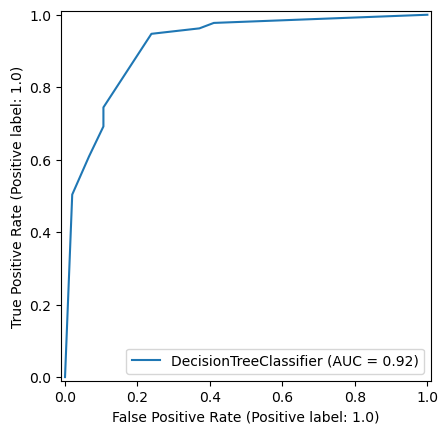

In [ ]:
#Plotting ROC curve and calculating AUC score for test set
print(RocCurveDisplay.from_estimator(Tree_best, X_test, y_test))
print("Współczynnik AUC na danych treningowych wynosi: %0.3f" %(roc_auc_score(y_test, Tree_best.predict_proba(X_test)[:, 1])))